# Ejercicios Pandas - Diana Chacón Ocariz

In [77]:
import pandas as pd

# Read data from file
df = pd.read_csv("users.csv")

print(df)

print(df.describe())

df.info()

     Unnamed: 0                name  age  gender         country  \
0             0    Mr Jerome Thomas   73    male   United States   
1             1       Mr Gary Berry   70    male  United Kingdom   
2             2     Mr Noham Dubois   40    male          France   
3             3   Mrs Naja Johansen   63  female         Denmark   
4             4  Mr Damien Marchand   61    male          France   
..          ...                 ...  ...     ...             ...   
195         195       Mr Raul Bravo   46    male           Spain   
196         196   Miss Maeva Fortin   40  female          Canada   
197         197   Mr Gabriel Berger   40    male          France   
198         198  Mrs Ülkü Tanrıkulu   37  female          Turkey   
199         199     Mr Raff Valkema   60    male     Netherlands   

                           email  
0      jerome.thomas@example.com  
1         gary.berry@example.com  
2       noham.dubois@example.com  
3      naja.johansen@example.com  
4    dam

### 1) Usuarios que no tienen email

In [78]:
sin_email = df[df['email'].isna()]
sin_email

,Unnamed: 0,name,age,gender,country,email


In [82]:
import random
import numpy as np

lista = df.index.tolist()

lista = random.choices(lista, k=5)

sin_email = df.index.isin(lista)

df_sin_email = df[sin_email]

df_sin_email


,Unnamed: 0,name,age,gender,country,email
25,25,Mrs Kaitlin Harper,32,female,Ireland,kaitlin.harper@example.com
49,49,Ms Laica Pires,27,female,Brazil,laica.pires@example.com
94,94,Ms Monica Chapman,30,female,Australia,monica.chapman@example.com
113,113,Miss Julcenira Peixoto,44,female,Brazil,julcenira.peixoto@example.com
152,152,Mr Edward Brown,72,male,New Zealand,edward.brown@example.com


### 2) Nompre y correo del usuario más joven de Canadá

In [53]:
# Devuelve el nombre y el email de la persona más joven de un país dado
def mas_joven_pais(df, pais):
    edad_joven = df[df['country'] == pais].age.min()

    joven = df[(df['country'] == pais) & (df['age'] == edad_joven)].loc[:,['name', 'email']]

    return joven

In [54]:
canadiense = mas_joven_pais(df, 'Canada')

canadiense

,name,email
184,Mr Philip Bélanger,philip.belanger@example.com


### 3) Nombre y correo canadiense y alemán más jóvenes

In [55]:
aleman = mas_joven_pais(df, 'Germany')

mas_jovenes = pd.concat([canadiense, aleman])

mas_jovenes

,name,email
184,Mr Philip Bélanger,philip.belanger@example.com
88,Mrs Hilda Epp,hilda.epp@example.com


### 4) 5 Países con mayor cantidad de usuarios

In [56]:
#Contamos los usuarios por país, los ordenamos por orden descendiente y seleccionamos los 5 primeros
mas_usuarios = df.groupby('country').count().name.sort_values(ascending=False)

mas_usuarios.head(5)

country
Ireland           16
Denmark           16
United Kingdom    15
New Zealand       14
Norway            14
Name: name, dtype: int64

### 5) País con más usuarios

In [57]:
# Escogemos el país con más usuarios del ejercicio anterior
mas_usuarios.head(1)

country
Ireland    16
Name: name, dtype: int64

### 6) País con más usuarios mayores de 50 años

In [58]:
# Similar al ejercicio anterior pero tomamos solo los mayores de 50 años
mas_usuarios_mayores = df[df['age'] > 50].groupby('country').count().name.sort_values(ascending=False)
mas_usuarios_mayores.head(1).index

Index(['Iran'], dtype='object', name='country')

### 7) Suma de los usuarios de Canadá y Alemania

In [59]:
paises = ['Canada', 'Germany']

usuarios_can_alem = df[df.country.isin(paises)].count().age

usuarios_can_alem

21

### 8) Cantidad de paises

In [60]:
paises = df['country'].unique().tolist()
print(paises)
len(paises)

['United States', 'United Kingdom', 'France', 'Denmark', 'Germany', 'Ireland', 'Finland', 'New Zealand', 'Australia', 'Spain', 'Canada', 'Switzerland', 'Netherlands', 'Turkey', 'Norway', 'Iran', 'Brazil']


17

### 9) Promedio de edad por país

In [61]:
promedio_edad = round(df.groupby('country').age.mean(), 1)

promedio_edad

country
Australia         51.2
Brazil            50.7
Canada            38.6
Denmark           48.8
Finland           42.2
France            48.9
Germany           39.6
Iran              54.2
Ireland           42.0
Netherlands       51.8
New Zealand       49.1
Norway            46.1
Spain             56.6
Switzerland       44.0
Turkey            47.0
United Kingdom    51.5
United States     53.5
Name: age, dtype: float64

### 10) País con más hombres

In [62]:
mas_hombres = df[df['gender'] == 'male'].groupby('country').count().name.sort_values(ascending=False)

mas_hombres.head(1)

country
Ireland    10
Name: name, dtype: int64

### 11) Porcentaje de hombres y mujeres por país

In [63]:
# Calculamos en total de hombres y mujeres por país, así como el total de personas
# Creamos un nuevo DF a partir de las 3 series calculadas

total = df.groupby('country').count().name
n_hombres = df[df['gender'] == 'male'].groupby('country').count().name
n_mujeres = df[df['gender'] == 'female'].groupby('country').count().name

generos = pd.concat([n_hombres, n_mujeres, total], axis=1)

generos.columns=['hombres', 'mujeres', 'total']

generos

,hombres,mujeres,total
country,,,
Australia,6,6,12
Brazil,4,5,9
Canada,7,5,12
Denmark,4,12,16
Finland,3,7,10
France,6,4,10
Germany,3,6,9
Iran,8,5,13
Ireland,10,6,16


In [64]:
# Aplicamos la función porcentaje a cada línea

def porcentaje(x, y):
    return round((y * 100 / x), 1)

generos['% hombres'] = generos.apply(lambda row: porcentaje(row['total'],
                     row['hombres']), axis = 1)

generos['% mujeres'] = generos.apply(lambda row: porcentaje(row['total'],
                     row['mujeres']), axis = 1)

generos

,hombres,mujeres,total,% hombres,% mujeres
country,,,,,
Australia,6,6,12,50.0,50.0
Brazil,4,5,9,44.4,55.6
Canada,7,5,12,58.3,41.7
Denmark,4,12,16,25.0,75.0
Finland,3,7,10,30.0,70.0
France,6,4,10,60.0,40.0
Germany,3,6,9,33.3,66.7
Iran,8,5,13,61.5,38.5
Ireland,10,6,16,62.5,37.5


### 12) Total de hombres y mujeres en el DF

In [65]:
hombres = generos['hombres'].sum()
mujeres = generos['mujeres'].sum()
total = generos['total'].sum()

totales = {
    'hombres': hombres,
    'mujeres': mujeres,
    'total': total,
    '% hombres': porcentaje(total, hombres),
    '% mujeres': porcentaje(total, mujeres),
}

# Se agrega una serie para poder conservar el índice de países
# Si se agrea el diccionario directamente, entonces
# ignore_index=True siempre, y se pierden los índices
linea_totales = pd.Series(totales, name='Totales')

generos = generos.append(linea_totales, ignore_index=False)

generos

,hombres,mujeres,total,% hombres,% mujeres
country,,,,,
Australia,6.0,6.0,12.0,50.0,50.0
Brazil,4.0,5.0,9.0,44.4,55.6
Canada,7.0,5.0,12.0,58.3,41.7
Denmark,4.0,12.0,16.0,25.0,75.0
Finland,3.0,7.0,10.0,30.0,70.0
France,6.0,4.0,10.0,60.0,40.0
Germany,3.0,6.0,9.0,33.3,66.7
Iran,8.0,5.0,13.0,61.5,38.5
Ireland,10.0,6.0,16.0,62.5,37.5


### 13) Cantidad de personas por grupo de edad y país: 

Para determinar los grupos de edad más idóneos, podemos calular la cantidad de usuarios por edad y hacer una grafica para tener una idea de la distribución

<AxesSubplot:xlabel='age'>

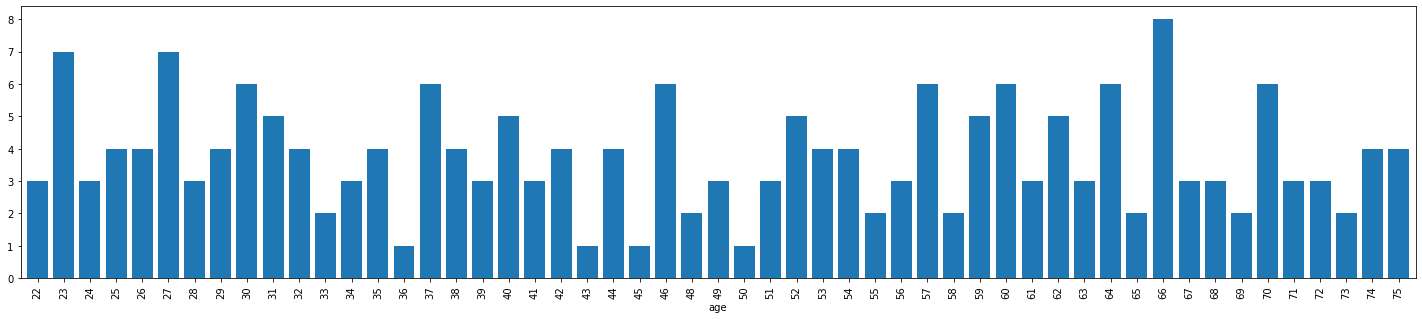

In [66]:
import matplotlib.pyplot as plt

edades = df.groupby('age').count().name

edades.plot(kind='bar', width=0.8, figsize=(25,5))

In [67]:
grupo_1 = df[df['age'] <= 35].groupby('country').count().name
grupo_2 = df[(df['age'] > 35) & (df['age'] <= 55)].groupby('country').count().name
grupo_3 = df[(df['age'] > 55) & (df['age'] <= 65)].groupby('country').count().name
grupo_4 = df[df['age'] > 65].groupby('country').count().name

grupo_edades = pd.concat([grupo_1, grupo_2, grupo_3, grupo_4], axis=1).fillna(0).astype('int8')

grupo_edades.columns=['Menor 35', 'Entre 36 y 55', 'Entre 56 y 65', 'Mayor de 65']

grupo_edades

,Menor 35,Entre 36 y 55,Entre 56 y 65,Mayor de 65
country,,,,
Australia,4,3,2,3
Brazil,2,3,1,3
Canada,6,4,2,0
Denmark,2,7,5,2
Finland,4,4,1,1
France,3,3,2,2
Germany,5,2,2,0
Iran,1,6,4,2
Ireland,7,5,3,1


<AxesSubplot:xlabel='country'>

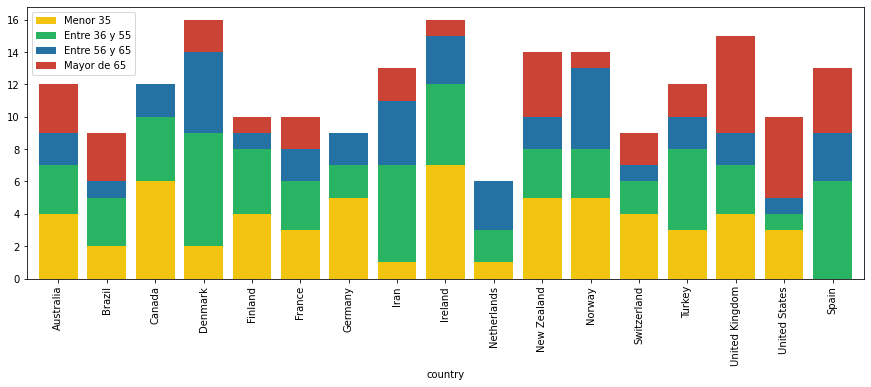

In [68]:
colores = ['#F1C40F', '#28B463', '#2471A3', '#CB4335']

grupo_edades.plot(kind='bar', width=0.8, figsize=(15,5), stacked='True', color=colores)